In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../data/raw/patient_01.csv")

df.head()


,time_sec,patient_id,heart_rate,spo2,sbp,dbp,motion
0,0,1,80.993428,98.570357,117.528194,77.624470,0.320948
1,1,1,79.723471,97.981802,117.842672,79.205353,0.309754
2,2,1,81.295377,97.787478,126.149436,81.068730,0.421992
3,3,1,83.046060,97.545886,120.002048,80.182187,0.173422
4,4,1,79.531693,97.459058,122.346390,78.296920,0.038449


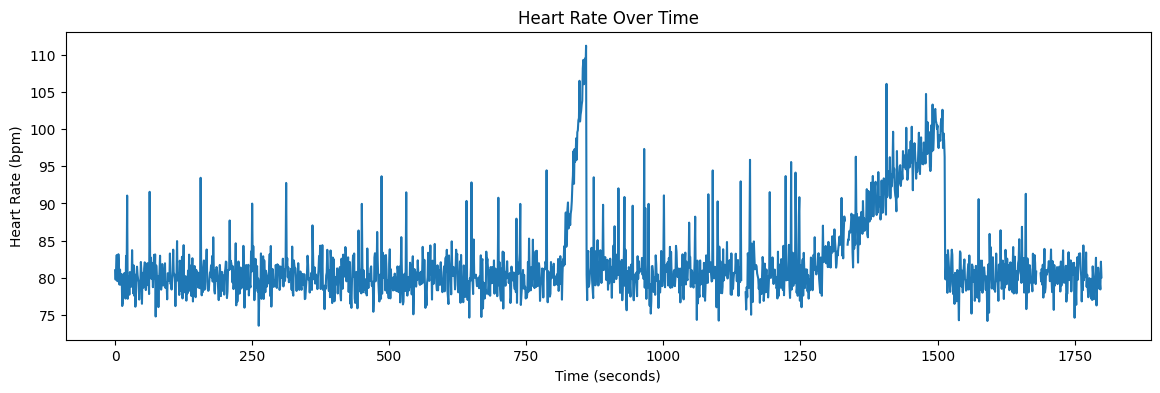

In [2]:
plt.figure(figsize=(14, 4))
plt.plot(df["time_sec"], df["heart_rate"])
plt.title("Heart Rate Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Heart Rate (bpm)")
plt.show()

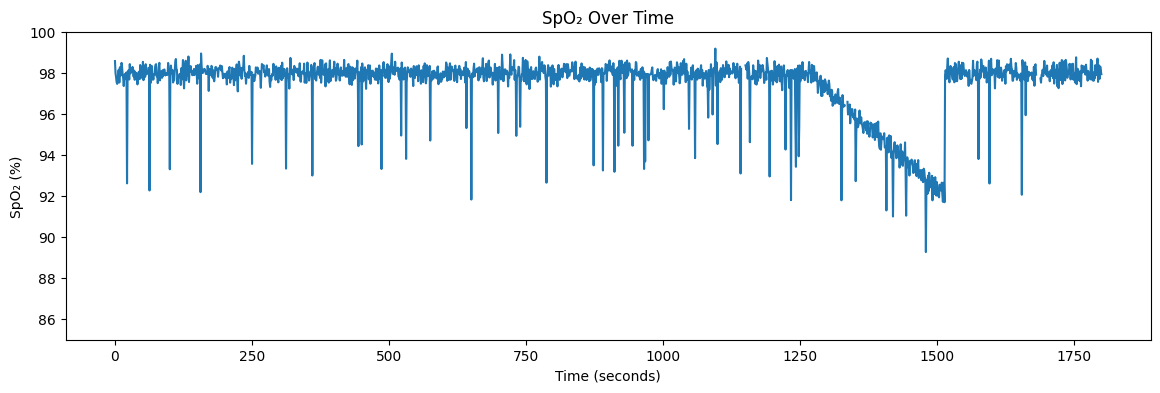

In [3]:
plt.figure(figsize=(14, 4))
plt.plot(df["time_sec"], df["spo2"])
plt.title("SpO₂ Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("SpO₂ (%)")
plt.ylim(85, 100)
plt.show()

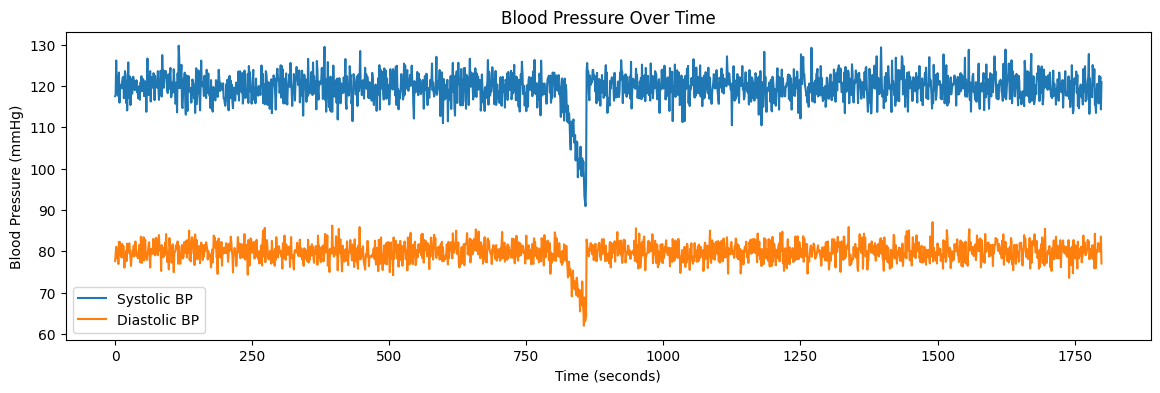

In [4]:
plt.figure(figsize=(14, 4))
plt.plot(df["time_sec"], df["sbp"], label="Systolic BP")
plt.plot(df["time_sec"], df["dbp"], label="Diastolic BP")
plt.title("Blood Pressure Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Blood Pressure (mmHg)")
plt.legend()
plt.show()

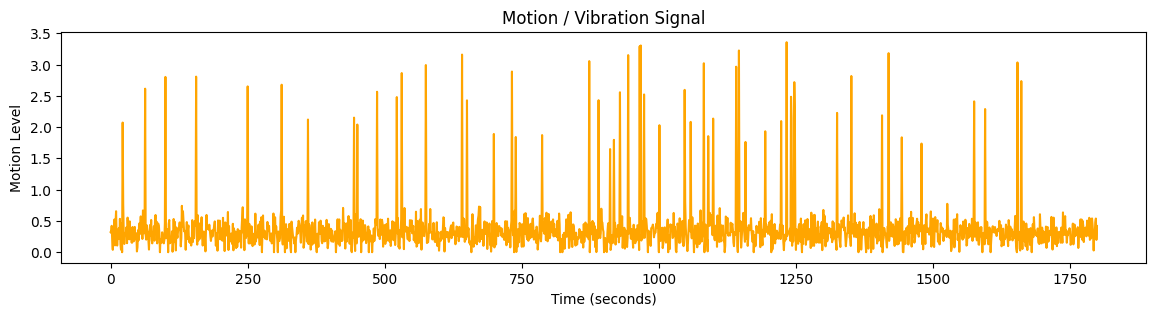

In [5]:
plt.figure(figsize=(14, 3))
plt.plot(df["time_sec"], df["motion"], color="orange")
plt.title("Motion / Vibration Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Motion Level")
plt.show()

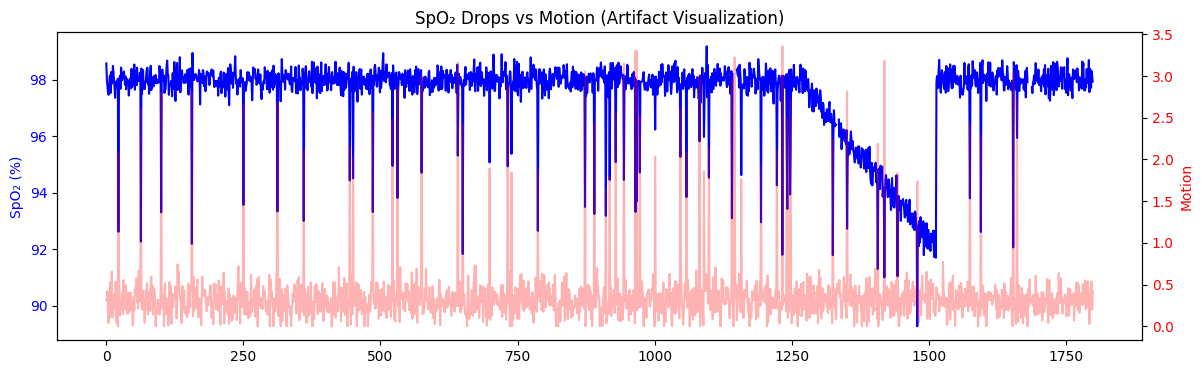

In [6]:
fig, ax1 = plt.subplots(figsize=(14, 4))

ax1.plot(df["time_sec"], df["spo2"], color="blue", label="SpO₂")
ax1.set_ylabel("SpO₂ (%)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(df["time_sec"], df["motion"], color="red", alpha=0.3, label="Motion")
ax2.set_ylabel("Motion", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("SpO₂ Drops vs Motion (Artifact Visualization)")
plt.show()

In [7]:
# Load cleaned data
df_clean = pd.read_csv("../data/processed/patient_01_clean.csv")
df_clean.head()

,time_sec,patient_id,heart_rate,spo2,sbp,dbp,motion,heart_rate_clean,spo2_clean,confidence
0,0,1,80.993428,98.570357,117.528194,77.624470,0.320948,80.993428,97.981802,1.0
1,1,1,79.723471,97.981802,117.842672,79.205353,0.309754,81.144403,97.884640,1.0
2,2,1,81.295377,97.787478,126.149436,81.068730,0.421992,80.993428,97.787478,1.0
3,3,1,83.046060,97.545886,120.002048,80.182187,0.173422,79.723471,97.545886,1.0
4,4,1,79.531693,97.459058,122.346390,78.296920,0.038449,81.295377,97.545886,1.0


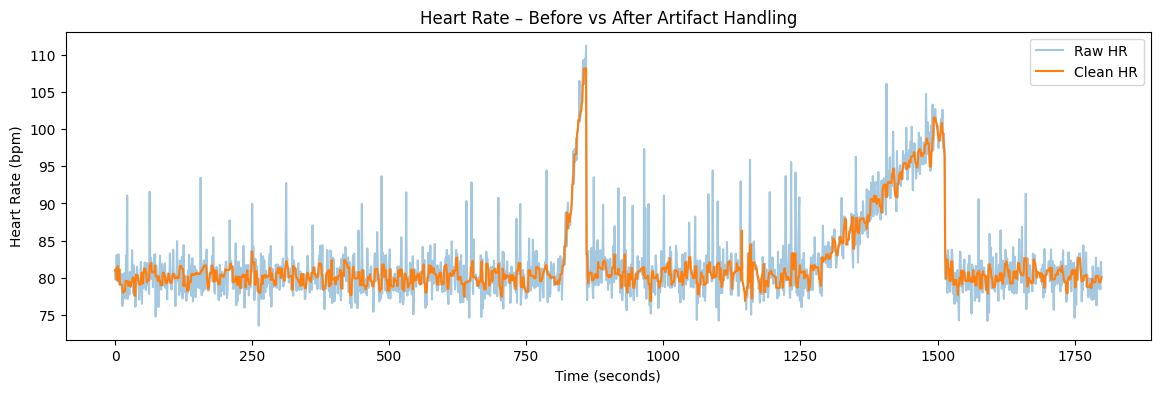

In [8]:
# HR before vs after
plt.figure(figsize=(14, 4))
plt.plot(df["time_sec"], df["heart_rate"], alpha=0.4, label="Raw HR")
plt.plot(df_clean["time_sec"], df_clean["heart_rate_clean"], label="Clean HR")
plt.title("Heart Rate – Before vs After Artifact Handling")
plt.xlabel("Time (seconds)")
plt.ylabel("Heart Rate (bpm)")
plt.legend()
plt.show()

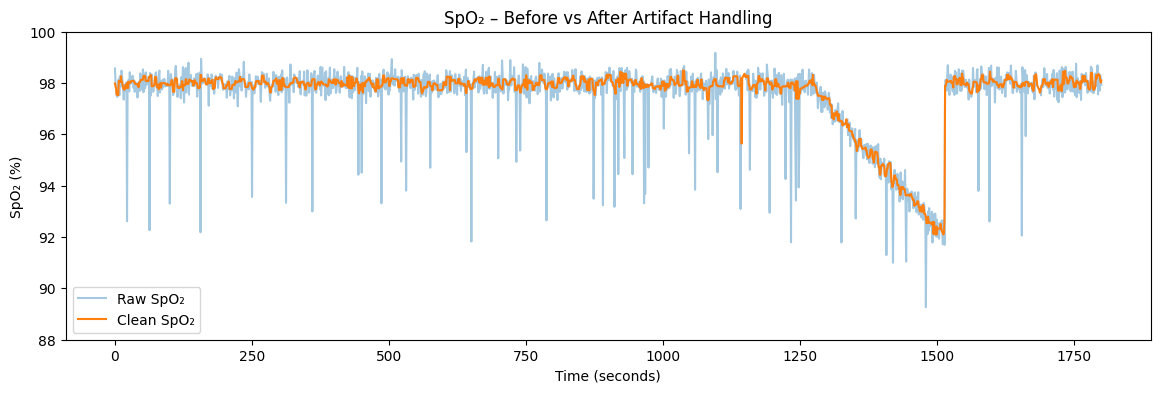

In [9]:
#spO2 before vs after
plt.figure(figsize=(14, 4))
plt.plot(df["time_sec"], df["spo2"], alpha=0.4, label="Raw SpO₂")
plt.plot(df_clean["time_sec"], df_clean["spo2_clean"], label="Clean SpO₂")
plt.title("SpO₂ – Before vs After Artifact Handling")
plt.xlabel("Time (seconds)")
plt.ylabel("SpO₂ (%)")
plt.ylim(88, 100)
plt.legend()
plt.show()

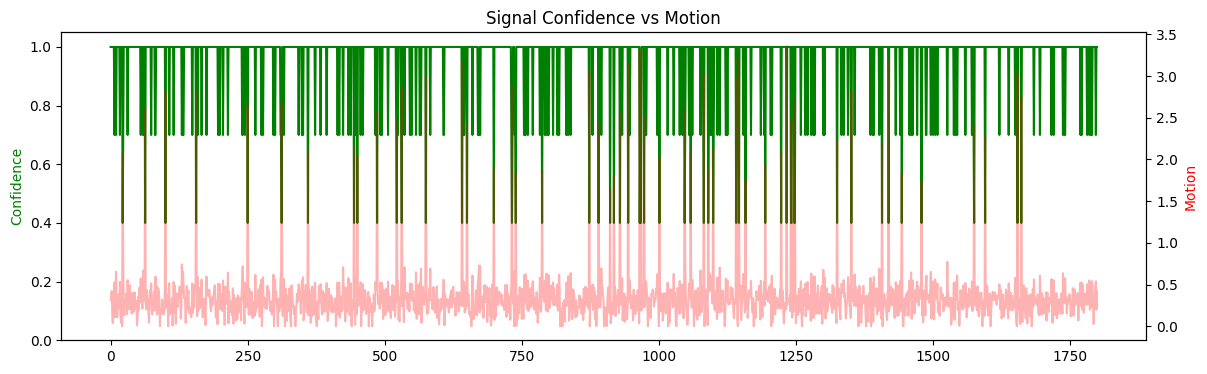

In [12]:
# Confidence vs Motion
fig, ax1 = plt.subplots(figsize=(14, 4))

ax1.plot(df_clean["time_sec"], df_clean["confidence"], color="green")
ax1.set_ylabel("Confidence", color="green")
ax1.set_ylim(0, 1.05)

ax2 = ax1.twinx()
ax2.plot(df_clean["time_sec"], df_clean["motion"], color="red", alpha=0.3)
ax2.set_ylabel("Motion", color="red")

plt.title("Signal Confidence vs Motion")
plt.show()

In [13]:
df_clean["confidence_smooth"] = (
    df_clean["confidence"]
    .rolling(window=15, center=True, min_periods=1)
    .mean()
)

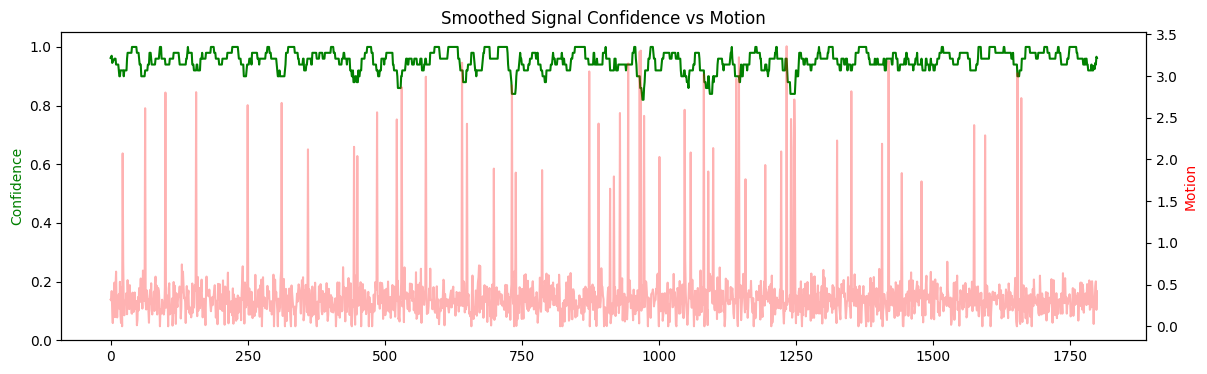

In [14]:
fig, ax1 = plt.subplots(figsize=(14, 4))

ax1.plot(
    df_clean["time_sec"],
    df_clean["confidence_smooth"],
    color="green",
    label="Confidence (smoothed)"
)
ax1.set_ylabel("Confidence", color="green")
ax1.set_ylim(0, 1.05)

ax2 = ax1.twinx()
ax2.plot(
    df_clean["time_sec"],
    df_clean["motion"],
    color="red",
    alpha=0.3,
    label="Motion"
)
ax2.set_ylabel("Motion", color="red")

plt.title("Smoothed Signal Confidence vs Motion")
plt.show()

In [15]:
# Feature checking
feat_df = pd.read_csv("../data/processed/patient_01_features.csv")
feat_df.head()

,time_sec,hr_mean,hr_slope,spo2_mean,spo2_slope,sbp_mean,dbp_mean,motion_mean,confidence_mean
0,29,79.505294,-0.069641,97.902549,0.007450,119.739645,79.478109,0.364222,0.733493
1,34,79.325365,-0.010143,97.958176,0.007046,119.699879,79.541959,0.377031,0.724007
2,39,79.039621,0.022988,97.980165,0.003074,119.988417,79.559124,0.364855,0.732613
3,44,79.201823,0.034443,97.959490,0.005466,119.631372,79.544219,0.360559,0.734470
4,49,79.417085,0.018536,98.007431,0.003104,119.446874,79.715737,0.346589,0.744619


In [16]:
# Loading anomaly output
anom_df = pd.read_csv("../data/processed/patient_01_anomalies.csv")
anom_df.head()

,time_sec,hr_mean,hr_slope,spo2_mean,spo2_slope,sbp_mean,dbp_mean,motion_mean,confidence_mean,anomaly_score,anomaly_flag
0,29,79.505294,-0.069641,97.902549,0.007450,119.739645,79.478109,0.364222,0.733493,-0.195688,0
1,34,79.325365,-0.010143,97.958176,0.007046,119.699879,79.541959,0.377031,0.724007,-0.202590,0
2,39,79.039621,0.022988,97.980165,0.003074,119.988417,79.559124,0.364855,0.732613,-0.204898,0
3,44,79.201823,0.034443,97.959490,0.005466,119.631372,79.544219,0.360559,0.734470,-0.208573,0
4,49,79.417085,0.018536,98.007431,0.003104,119.446874,79.715737,0.346589,0.744619,-0.210521,0


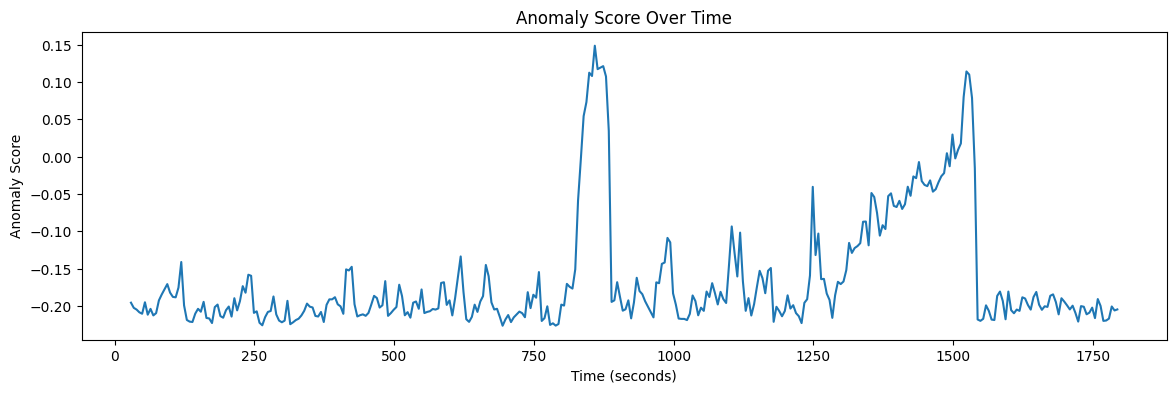

In [17]:
# Anomaly score over time
plt.figure(figsize=(14, 4))
plt.plot(anom_df["time_sec"], anom_df["anomaly_score"])
plt.title("Anomaly Score Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Anomaly Score")
plt.show()

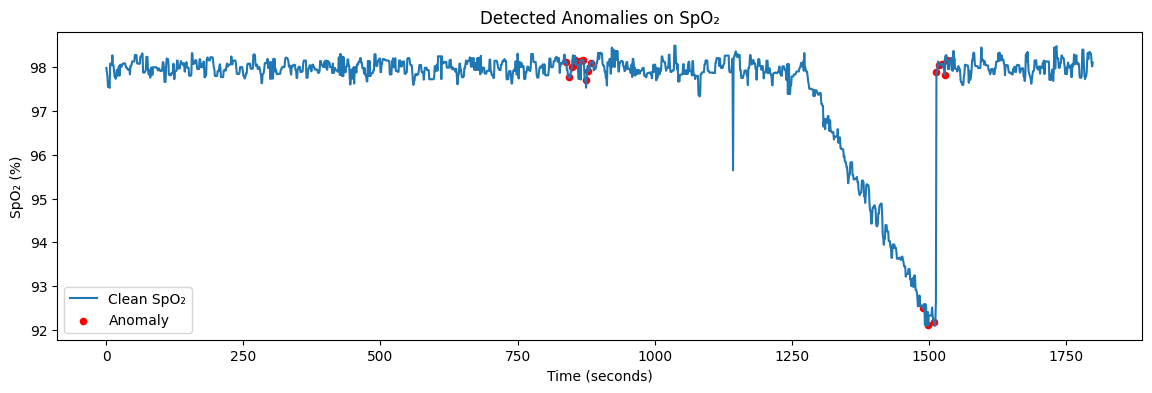

In [18]:
# Marking anomaly flag on SpO2
plt.figure(figsize=(14, 4))
plt.plot(df_clean["time_sec"], df_clean["spo2_clean"], label="Clean SpO₂")

anomaly_times = anom_df[anom_df["anomaly_flag"] == 1]["time_sec"]
plt.scatter(
    anomaly_times,
    [df_clean.loc[df_clean["time_sec"] == t, "spo2_clean"].values[0]
     for t in anomaly_times],
    color="red",
    s=20,
    label="Anomaly"
)

plt.xlabel("Time (seconds)")
plt.ylabel("SpO₂ (%)")
plt.title("Detected Anomalies on SpO₂")
plt.legend()
plt.show()

In [19]:
# Loading risk outputs
risk_df = pd.read_csv("../data/processed/patient_01_risk.csv")
risk_df.head()

,time_sec,hr_mean,hr_slope,spo2_mean,spo2_slope,sbp_mean,dbp_mean,motion_mean,confidence_mean,anomaly_score,anomaly_flag,anomaly_norm,spo2_risk,trend_risk,risk_score,alert_raw,alert
0,29,79.505294,-0.069641,97.902549,0.007450,119.739645,79.478109,0.364222,0.733493,-0.195688,0,0.082287,0.040685,0.063355,6.828705,0,0
1,34,79.325365,-0.010143,97.958176,0.007046,119.699879,79.541959,0.377031,0.724007,-0.202590,0,0.063885,0.030975,0.013885,4.230305,0,0
2,39,79.039621,0.022988,97.980165,0.003074,119.988417,79.559124,0.364855,0.732613,-0.204898,0,0.057730,0.027136,0.021213,4.065624,0,0
3,44,79.201823,0.034443,97.959490,0.005466,119.631372,79.544219,0.360559,0.734470,-0.208573,0,0.047933,0.030745,0.032648,3.990973,0,0
4,49,79.417085,0.018536,98.007431,0.003104,119.446874,79.715737,0.346589,0.744619,-0.210521,0,0.042738,0.022377,0.017561,3.111245,0,0


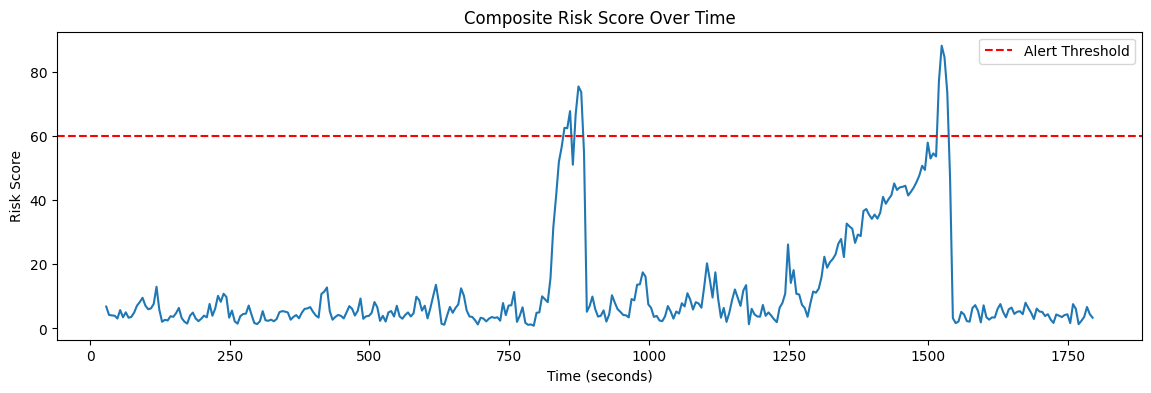

In [20]:
# Plotting risk score over time
plt.figure(figsize=(14, 4))
plt.plot(risk_df["time_sec"], risk_df["risk_score"])
plt.axhline(60, color="red", linestyle="--", label="Alert Threshold")
plt.xlabel("Time (seconds)")
plt.ylabel("Risk Score")
plt.title("Composite Risk Score Over Time")
plt.legend()
plt.show()

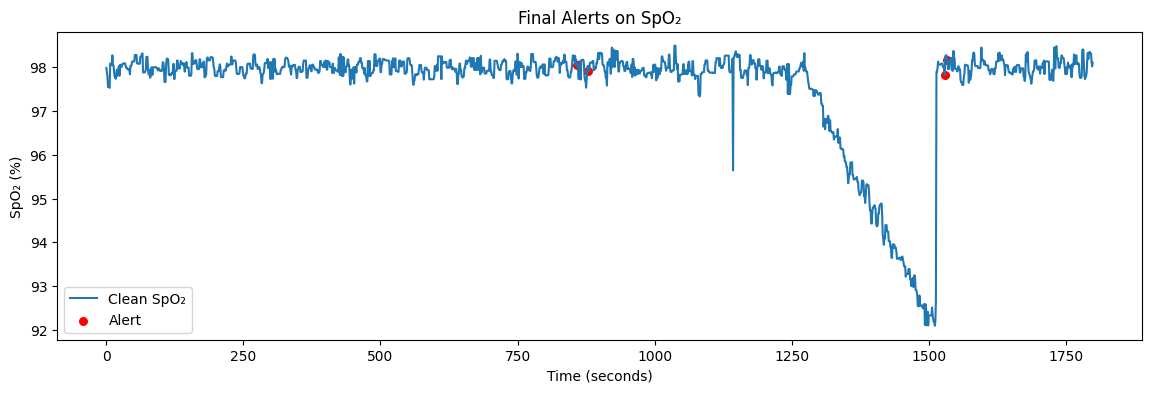

In [21]:
# Plotting alerts on SpO2
plt.figure(figsize=(14, 4))
plt.plot(df_clean["time_sec"], df_clean["spo2_clean"], label="Clean SpO₂")

alert_times = risk_df[risk_df["alert"] == 1]["time_sec"]
plt.scatter(
    alert_times,
    [df_clean.loc[df_clean["time_sec"] == t, "spo2_clean"].values[0]
     for t in alert_times],
    color="red",
    s=30,
    label="Alert"
)

plt.xlabel("Time (seconds)")
plt.ylabel("SpO₂ (%)")
plt.title("Final Alerts on SpO₂")
plt.legend()
plt.show()